In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('EGOV_DATA_2024.csv')

In [29]:
df = df.drop(columns=[
    'Survey Year',
    'E-Government Rank'
])

In [30]:
df_response = pd.DataFrame()

In [31]:
df_response['Região'] = ['Mundo', 'Brasil']

In [32]:
df_brasil = df[df['Country Name'] == 'Brazil']

In [33]:
mediana_egov_mundo = df['E-Government Index'].median()
mediana_egov_brasil = df_brasil['E-Government Index'].median()
df_response['E-Government Development Index'] = [mediana_egov_mundo, mediana_egov_brasil]

In [34]:
mediana_epart_mundo = df['E-Participation Index'].median()
mediana_epart_brasil = df_brasil['E-Participation Index'].median()
df_response['E-Participation Index'] = [mediana_epart_mundo, mediana_epart_brasil]

In [35]:
mediana_osi_mundo = df['Online Service Index'].median()
mediana_osi_brasil = df_brasil['Online Service Index'].median()
df_response['Online Service Index'] = [mediana_osi_mundo, mediana_osi_brasil]

In [36]:
mediana_hci_mundo = df['Human Capital Index'].median()
mediana_hci_brasil = df_brasil['Human Capital Index'].median()
df_response['Human Capital Index'] = [mediana_hci_mundo, mediana_hci_brasil]

In [37]:
mediana_tci_mundo = df['Telecommunication Infrastructure Index'].median()
mediana_tci_brasil = df_brasil['Telecommunication Infrastructure Index'].median()
df_response['Telecommunication Infrastructure Index'] = [mediana_tci_mundo, mediana_tci_brasil]

In [38]:
df_response = df_response.melt(
    id_vars='Região',
    value_vars=[
        'E-Government Development Index',
        'E-Participation Index',
        'Online Service Index',
        'Human Capital Index',
        'Telecommunication Infrastructure Index'
    ],
    var_name='Métricas',
    value_name='Escala'
)

<function matplotlib.pyplot.show(close=None, block=None)>

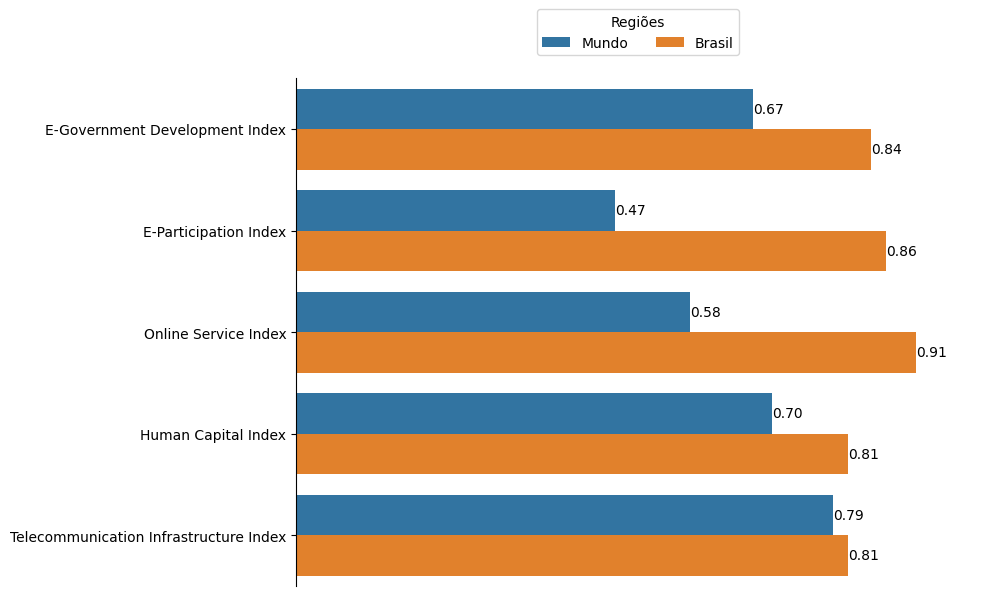

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(df_response, orient='h', x='Escala', y='Métricas', hue='Região', palette='tab10')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.legend(title='Regiões', bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=len(df_response['Região'].unique()))

sns.despine(bottom=True)
ax.xaxis.set_visible(False)
plt.xlim(0, 1)
plt.ylabel('')
plt.tight_layout()
fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/barplot_egdi_mediamundial_brasil.png', dpi=300, bbox_inches='tight')
plt.show